# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

## 준비

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [117]:
diabetes = load_diabetes()
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [118]:
dfX = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dfy = pd.DataFrame(diabetes.target, columns=['target'])

In [119]:
dfX

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [120]:
dfy

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [121]:
X = dfX.values
y = dfy['target'].values

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 모델

In [123]:
W = np.random.rand(10)
b = np.random.rand()

In [124]:
W

array([0.66825074, 0.80815795, 0.78294501, 0.35441171, 0.16956484,
       0.06786108, 0.8074366 , 0.59323561, 0.64464944, 0.71847304])

In [125]:
b

0.5481294992528394

In [126]:
def model(X,W,b):
    predictions = 0
    for i in range(10):
        predictions += X[:,i]*W[i]
    predictions += b
    return predictions

## 손실함수

In [127]:
def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse

In [128]:
def loss(X,W,b,y):
    predictions = model(X,W,b)
    Loss = MSE(predictions,y)
    return Loss


## gradient 함수 

In [129]:
def gradient(X,W,b,y):
    N = len(W)
    y_pred = model(X,W,b)
    
    dW = 1/N * 2 * (X.T).dot(y_pred-y)
    db = 2 * (y_pred-y).mean()
    return dW, db

## 학습

In [130]:
learning_rate = 0.001

In [142]:
losses = []

for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate*dW
    b -= learning_rate*db
    L = loss(X, W, b, y)
    losses.append(L)
    
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2889.4745
Iteration 20 : Loss 2889.4639
Iteration 30 : Loss 2889.4534
Iteration 40 : Loss 2889.4429
Iteration 50 : Loss 2889.4324
Iteration 60 : Loss 2889.4220
Iteration 70 : Loss 2889.4116
Iteration 80 : Loss 2889.4013
Iteration 90 : Loss 2889.3909
Iteration 100 : Loss 2889.3807
Iteration 110 : Loss 2889.3704
Iteration 120 : Loss 2889.3602
Iteration 130 : Loss 2889.3500
Iteration 140 : Loss 2889.3399
Iteration 150 : Loss 2889.3298
Iteration 160 : Loss 2889.3197
Iteration 170 : Loss 2889.3097
Iteration 180 : Loss 2889.2997
Iteration 190 : Loss 2889.2897
Iteration 200 : Loss 2889.2798
Iteration 210 : Loss 2889.2699
Iteration 220 : Loss 2889.2600
Iteration 230 : Loss 2889.2502
Iteration 240 : Loss 2889.2404
Iteration 250 : Loss 2889.2306
Iteration 260 : Loss 2889.2209
Iteration 270 : Loss 2889.2112
Iteration 280 : Loss 2889.2015
Iteration 290 : Loss 2889.1919
Iteration 300 : Loss 2889.1823
Iteration 310 : Loss 2889.1727
Iteration 320 : Loss 2889.1632
Iteration 330 : L

## 예측

In [145]:
predictions = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3032.429962341587

## 시각화

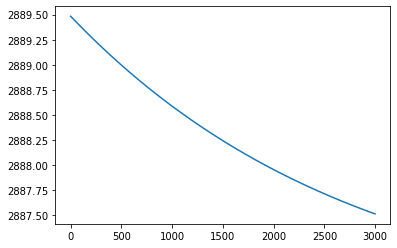

In [146]:
plt.plot(losses)
plt.show()

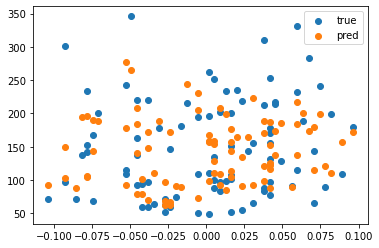

In [147]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

=====================================================================================================================

# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## 준비

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

## 데이터 불러오기

In [149]:
train = pd.read_csv("~/aiffel/bike_regression/data/bike-sharing-demand/train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


##  datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [150]:
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')

In [151]:
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second

In [152]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## 시각화

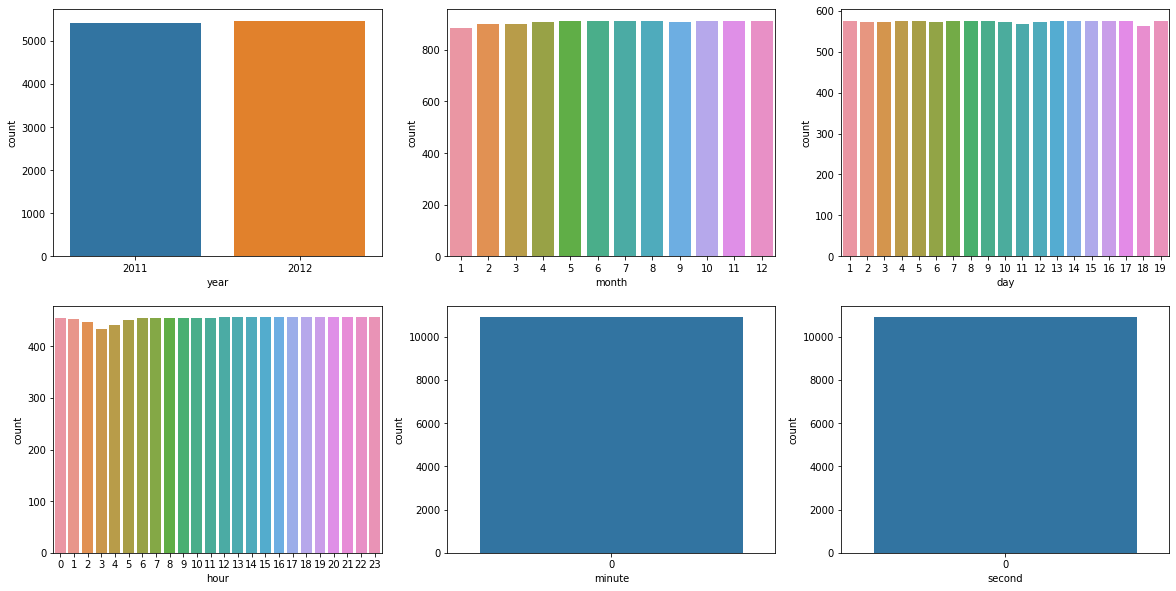

In [153]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.countplot(x='year', data=train)

plt.subplot(2,3,6)
sns.countplot(x='second', data=train)

plt.subplot(2,3,2)
sns.countplot(x='month', data=train)

plt.subplot(2,3,5)
sns.countplot(x='minute', data=train)

plt.subplot(2,3,3)
sns.countplot(x='day', data=train)

plt.subplot(2,3,4)
sns.countplot(x='hour', data=train)

plt.show()

## X, y 컬럼 선택 및 train/test 데이터 분리

In [154]:
X = train[['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',]].values
y = train[['count']].values

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## train

In [156]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 예측

In [157]:
predictions = model.predict(X_test)
predictions

array([[-33.96697339],
       [ 59.23679918],
       [112.62548605],
       ...,
       [195.79183719],
       [197.74006566],
       [294.24680107]])

In [158]:
rmse = mean_squared_error(y_test, predictions, squared = False)
rmse

140.47528542723475

## 시각화

In [159]:
col = ['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']
X_test_df = pd.DataFrame(X_test, columns=col)
X_test_df['predictions'] = predictions
X_test_df['y_test'] = y_test

In [160]:
X_test_df

,season,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,predictions,y_test
0,1.0,1.0,2.0,6.56,9.090,80.0,8.9981,2011.0,2.0,4.0,9.0,-33.966973,127
1,2.0,1.0,2.0,14.76,16.665,71.0,19.0012,2011.0,4.0,8.0,10.0,59.236799,73
2,3.0,1.0,3.0,24.60,27.275,88.0,8.9981,2011.0,9.0,7.0,9.0,112.625486,190
3,2.0,1.0,1.0,16.40,20.455,56.0,23.9994,2011.0,4.0,4.0,1.0,44.829705,11
4,4.0,1.0,2.0,22.14,25.760,49.0,8.9981,2012.0,10.0,17.0,13.0,303.039383,310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,1.0,1.0,1.0,12.30,13.635,61.0,19.9995,2012.0,3.0,7.0,1.0,76.753725,5
2174,1.0,1.0,1.0,28.70,31.820,39.0,16.9979,2012.0,3.0,15.0,17.0,356.228964,713
2175,2.0,1.0,1.0,18.86,22.725,72.0,15.0013,2011.0,5.0,6.0,22.0,195.791837,151
2176,1.0,1.0,1.0,12.30,13.635,42.0,31.0009,2012.0,1.0,18.0,13.0,197.740066,130


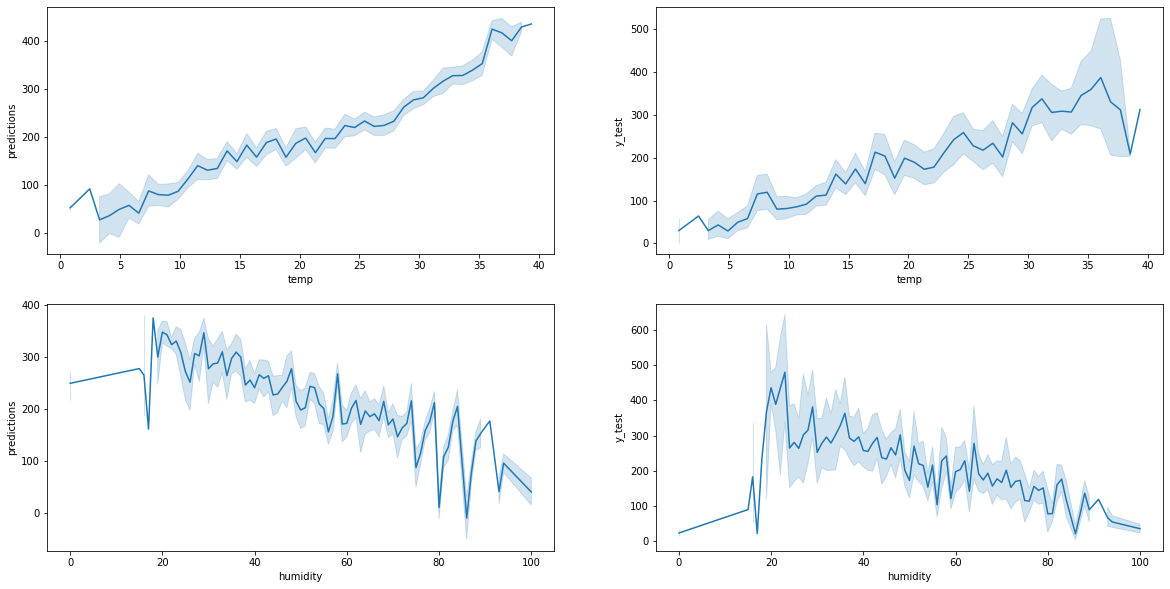

In [161]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.lineplot(x=X_test_df['temp'], y=X_test_df['predictions'])

plt.subplot(2,2,3)
sns.lineplot(x=X_test_df['humidity'], y=X_test_df['predictions'])

plt.subplot(2,2,2)
sns.lineplot(x=X_test_df['temp'], y=X_test_df['y_test'])

plt.subplot(2,2,4)
sns.lineplot(x=X_test_df['humidity'], y=X_test_df['y_test'])

plt.show()